# KKBox Analysis

In [1]:
# Load Python libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from yellowbrick.target import FeatureCorrelation
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
df_train = pd.read_csv('C:/Users/ekwaning/Documents/Flatiron/Capstone/Capstone-Project/Data/train_1.csv')

In [3]:
df_train = df_train.drop(['Unnamed: 0'], axis=1)

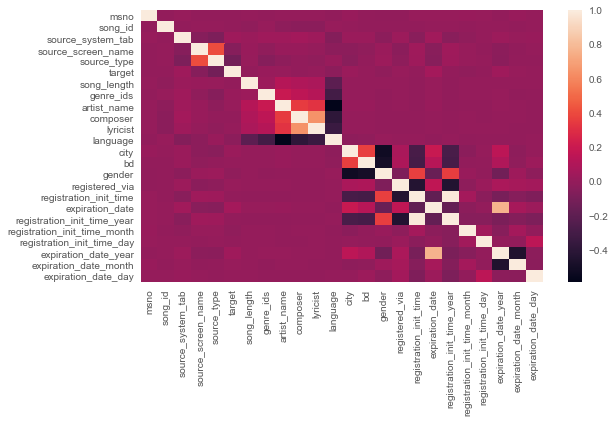

In [4]:
# Сorrelation matrix
plt.figure(figsize=[9,5])
sns.heatmap(df_train.corr())
plt.show()

Feature Correlation

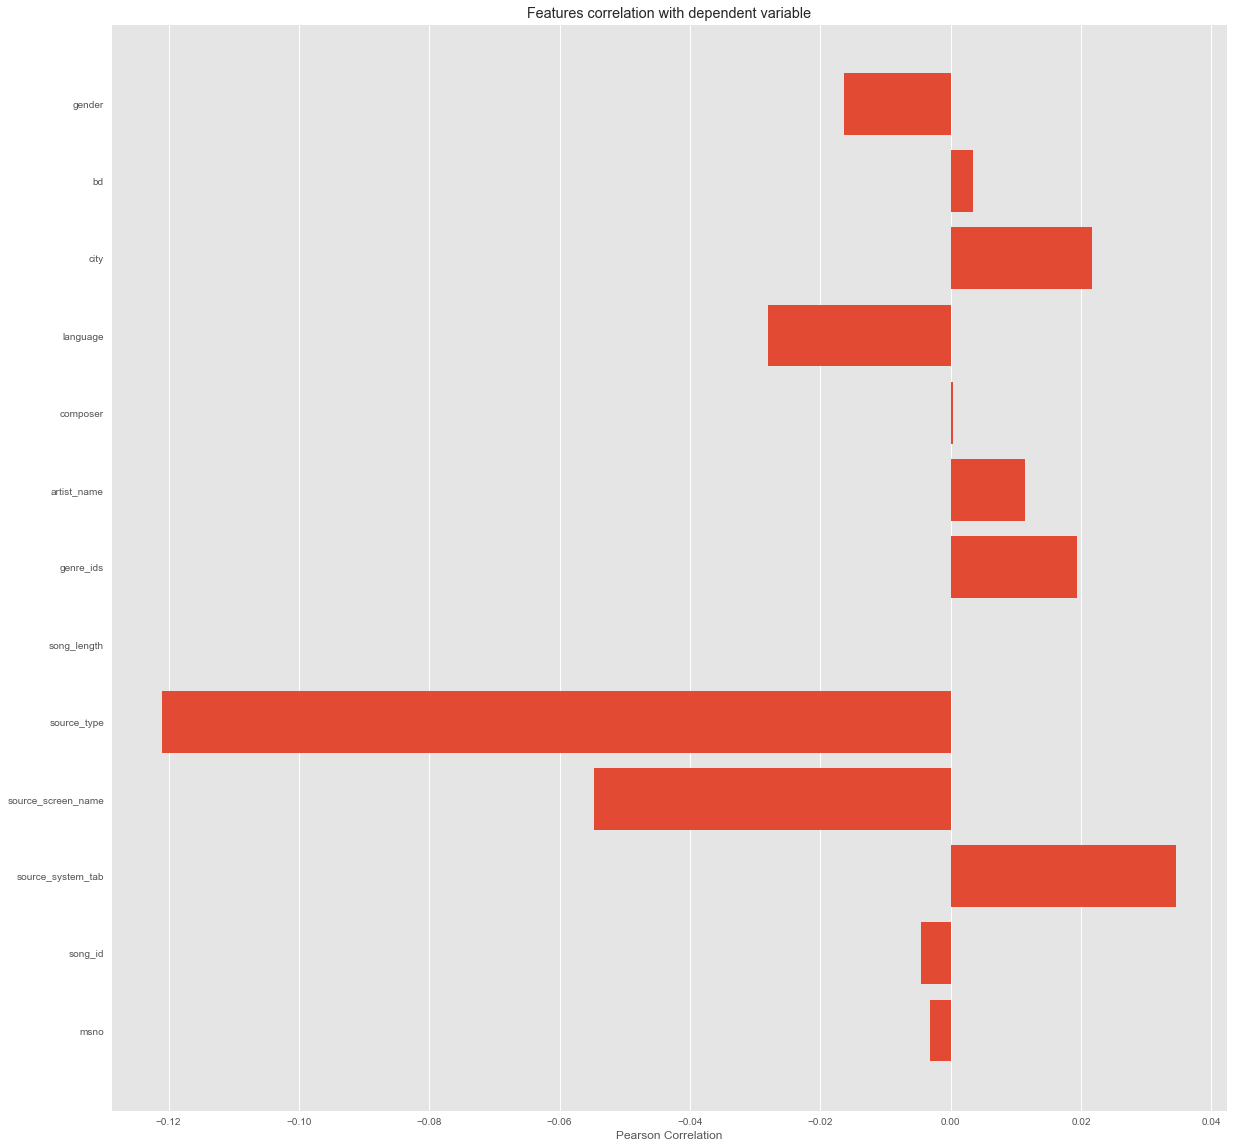

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [5]:
feature_names = ['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'song_length', 'genre_ids', 'artist_name', 'composer','language','city','bd','gender']

X, y = df_train[feature_names], df_train['target']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

## Random Forest
find the most important features

In [15]:
# Train & Test split
data_train, data_test, target_train, target_test = train_test_split(df_train[df_train.columns[df_train.columns != 'target']], df_train.target, 
                                                                    test_size = 0.25, random_state=250)

In [7]:
 #Model with the best estimator
model = RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(data_train, target_train)

RandomForestClassifier(max_depth=25, n_estimators=250)

In [8]:
model.score(data_train,target_train)

0.9937104644858124

In [9]:
model.score(data_test, target_test)

0.6414009976144004

In [10]:
df_plot = pd.DataFrame({'features': df_train.columns[df_train.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

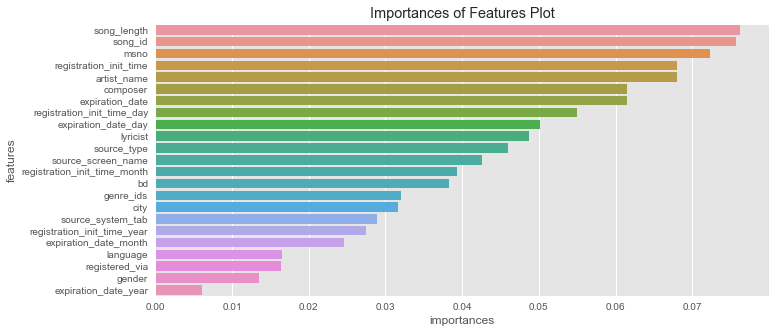

In [11]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [12]:
# Drop columns with importances < 0.04
df_train = df_train.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [13]:
# Selected columns
df_train.columns

Index(['msno', 'song_id', 'source_screen_name', 'source_type', 'target',
       'song_length', 'artist_name', 'composer', 'lyricist',
       'registration_init_time', 'expiration_date',
       'registration_init_time_day', 'expiration_date_day'],
      dtype='object')

In [14]:
df_train.to_csv(r'C:/Users/ekwaning/Documents/Flatiron/Capstone/Capstone-Project/Data/train_2.csv')